## **Rainfall Prediction Machine Learning Model**
** **

### **Objective**
> The primary objective of this project is to predict whether there will be rainfall or not by analyzing various meteorological factors( listed below ). The model aims to classify each day as either **rainy** or **non-rainy**.
> ** **


**We are going to take the following approach:**
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

  ** **

### 1. Problem definition
In statement,
> Given meteorological factors of a day, can we predict if it's going to rain or not?

### 2. Data
The Original data came from the `Kaggle` . https://www.kaggle.com/datasets/amanpandit87/rainfall-prediction-dataset

### 3. Evaluation
> If we can reach 80% accuracy at predicting whether it's going to rain or not.

### 4. Features
* `ID`: A unique identifier for each record.
* `Day`: Represents the day of the year (1 to 366).
* `Pressure`: Ranges from 998.5 to 1034.6 hPa.
* `Max-Min Temperature`: ranges from (3.1°C to 7.1°C) to (30°C to 36.3°C).
* `Temperature`: ranges from  4.9°C to 32.4°C
* `Dew Point`: Ranges from -0.4°C to 26.7°C.
* `Humidity`: Ranges from 36% to 98%.
* `Cloud Cover`: Ranges from 0% to 100%.
* `Sunshine Duration`: Ranges from 0 to 12.1 hours.
* `Wind Speed`: Ranges from 4.4 km/h to 59.5 km/h.
* `Wind Direction`: Categorical, with 32 unique values that ranges from 10 to 350.
* `Rainfall`: Binary target variable (0 = No Rain, 1 = Rain).


### 5. Modeling
> For the selection of model we will use the official site of scikit-learn. For more info visit https://scikit-learn.org/stable/machine_learning_map.html


### 6. Experimentation


In [50]:
# import all the tools we need

# Regular EDA(exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
# we want our plots to apeear inside the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Models from scikit-learn
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Model evaluation
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import precision_score , recall_score , f1_score
from sklearn.metrics import roc_auc_score , roc_curve
from sklearn.metrics import RocCurveDisplay



### Load the data

In [51]:
data = pd.read_csv("E:\\Machine-Learning-Projects\\major_project\\data\\csv-files\\Rainfall-final.csv")

data

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,1,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,1,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,1,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,1,1.2,20.0,20.9


#### Replace the NaN values in the data
we have 1 row in which windspeed and winddirection is missing.
we will fill the value using the pandas

In [52]:
data["winddirection"] = data['winddirection'].fillna(data['winddirection'].mean())
data["windspeed"] = data['windspeed'].fillna(data['windspeed'].mean())


### Now we have filled all the missing vales of our data now there is no missing values in our data

### Now we will look at our data in detail

In [53]:
# This is the information of the data , listed all columns their dtype

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            366 non-null    int64  
 1   pressure       366 non-null    float64
 2   maxtemp        366 non-null    float64
 3   temparature    366 non-null    float64
 4   mintemp        366 non-null    float64
 5   dewpoint       366 non-null    float64
 6   humidity       366 non-null    int64  
 7   cloud          366 non-null    int64  
 8   rainfall       366 non-null    int64  
 9   sunshine       366 non-null    float64
 10  winddirection  366 non-null    float64
 11  windspeed      366 non-null    float64
dtypes: float64(8), int64(4)
memory usage: 34.4 KB


In [54]:
# describe the data using describe function

data.describe().style.background_gradient(cmap="coolwarm")

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,15.756831,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,0.680328,4.419399,101.506849,21.536986
std,8.823592,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,0.466988,3.934398,81.611697,10.055908
min,1.000000,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,0.000000,10.000000,4.400000
25%,8.000000,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.000000,0.500000,40.000000,13.725000
50%,16.000000,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,1.000000,3.500000,70.000000,20.500000
75%,23.000000,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,1.000000,8.200000,190.000000,27.825000
max,31.000000,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,1.000000,12.100000,350.000000,59.500000


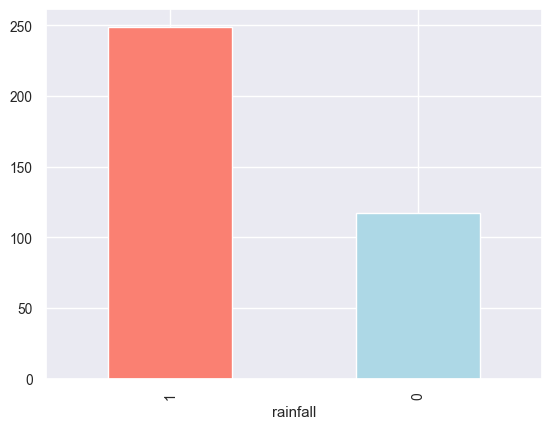

In [55]:
data["rainfall"].value_counts().plot(kind="bar" , color=["salmon" , "lightblue"]);


#### Plot of sunshine vs rainfall

In [56]:
# fig , ax = plt.subplots(figsize=(8,6))
# ax.scatter(data.temparature[data.rainfall==1] , data.humidity[data.rainfall==1] , color="blue")
# ax.scatter(data.temparature[data.rainfall==0] , data.humidity[data.rainfall==0] , color="lightgreen")
# ax.set_title("Rain in function of Temperature vs Humidity")
# ax.set_xlabel("Temperature")
# ax.set_ylabel("Humidity")
# ax.legend(["Rainy" , "Non-Rainy"])
#
# plt.show()

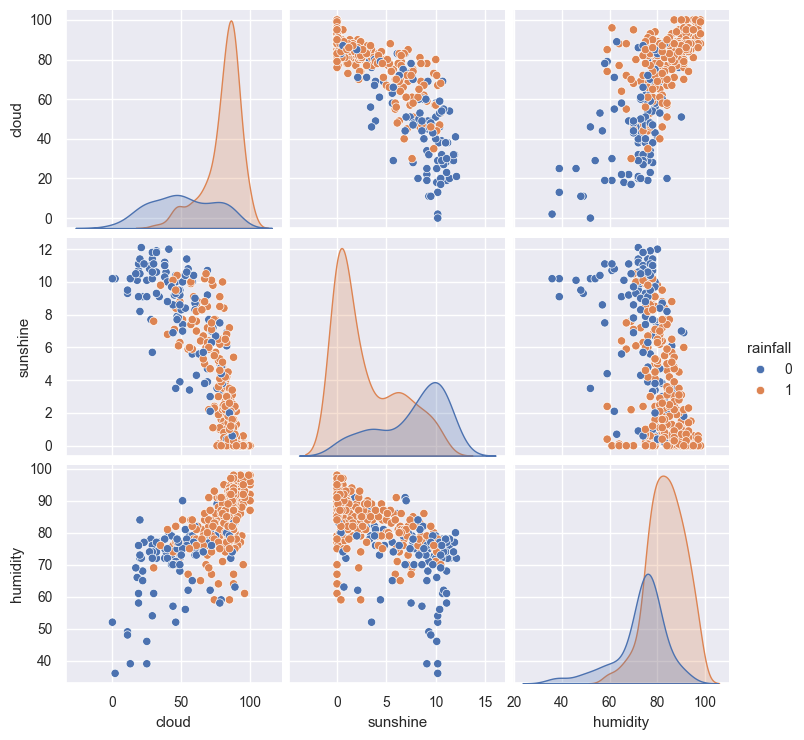

In [57]:
top_features = ['cloud', 'sunshine' , 'humidity' ,'rainfall']
sns.pairplot(data[top_features] , hue="rainfall" , diag_kind="auto" );

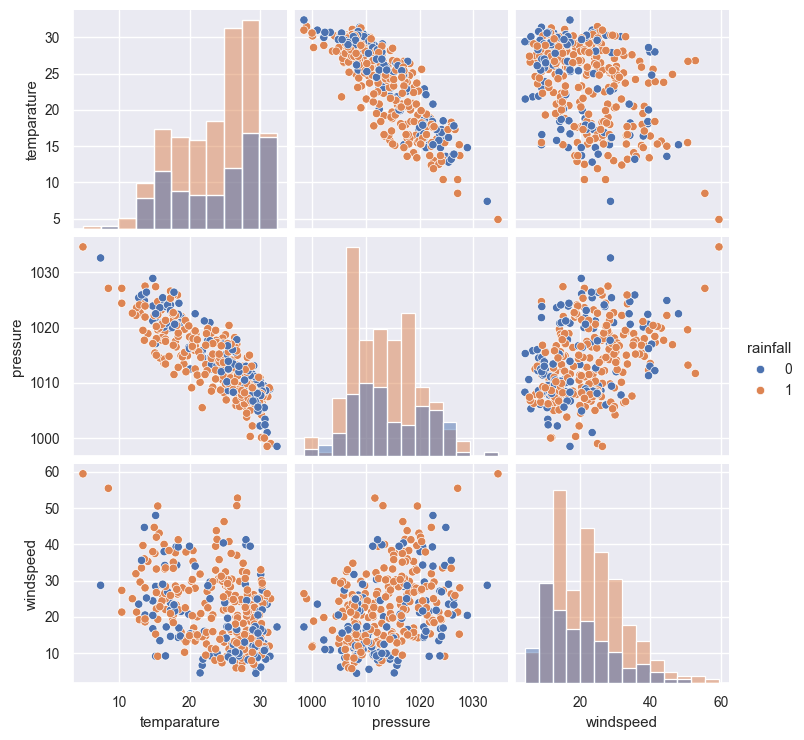

In [58]:
top_features = ['temparature' , 'pressure' , 'windspeed' ,'rainfall']
sns.pairplot(data[top_features] , hue="rainfall" , diag_kind="hist" );

#### Correlation matrix

Text(0.5, 1.0, 'Correlation Matrix')

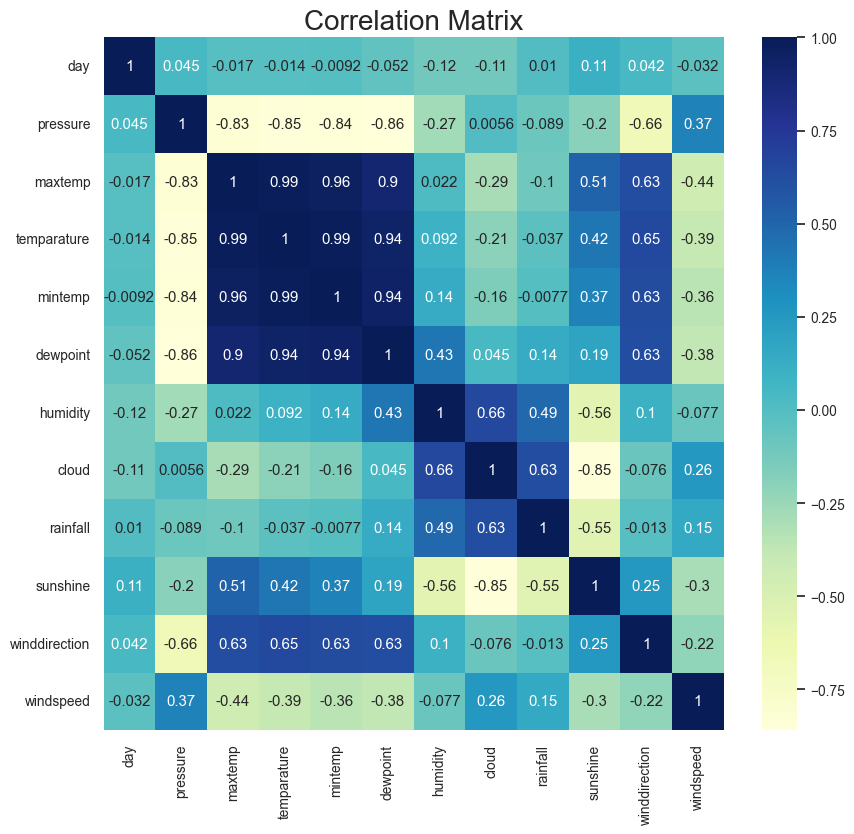

In [59]:
corr_mat = data.corr()
fig , ax = plt.subplots(figsize=(10,9))
ax = sns.heatmap(corr_mat, annot=True, cmap="YlGnBu");
ax.set_title("Correlation Matrix" , fontsize=20)

### Modeling

In [60]:
data.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7


In [61]:
# split the data in x and y where x is feature variable and y is target variable

x = data.drop("rainfall" , axis=1)
y = data["rainfall"]

In [62]:
x.shape , y.shape

((366, 11), (366,))

In [63]:
# Split the data in train and test sets

#np.random.seed(23)
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2)


Now we have got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on test set.

We are going to try 4 machine learning models:
1. `Logistic Regression`
2. `K_Nearest Neighbors Classifier`
3. `Random Forest Classifier`
4. `Linear SVC`

In [64]:
# Put models in a directory

models = {"Logistic Regression" : LogisticRegression() ,
          "K_Nearest_Neighbors" : KNeighborsClassifier() ,
          "Random_Forest" : RandomForestClassifier() ,
          "Linear SVC" : LinearSVC()
          }

# Create a function to fit and score models

def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dictionary of different scikit learn machine learning models
    x_train: feature variables of training set
    x_test: feature variables of test set
    y_train: target variable of training set
    y_test : target variable of test set
    """
    # set a random seed
    #np.random.seed(23)
    # Make a dictionary to keep model scores
    model_scores = {}
    # loop through models
    for name,model in models.items():
        # fit the model to the data
        model.fit(x_train,y_train)
        # evaluate the model to the data
        model_scores[name] = model.score(x_test,y_test)
    # return the dictionary
    return model_scores


In [65]:
model_scores = fit_and_score(models=models, x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test)
model_scores

D:\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8108108108108109,
 'K_Nearest_Neighbors': 0.8378378378378378,
 'Random_Forest': 0.8243243243243243,
 'Linear SVC': 0.8513513513513513}

<Axes: >

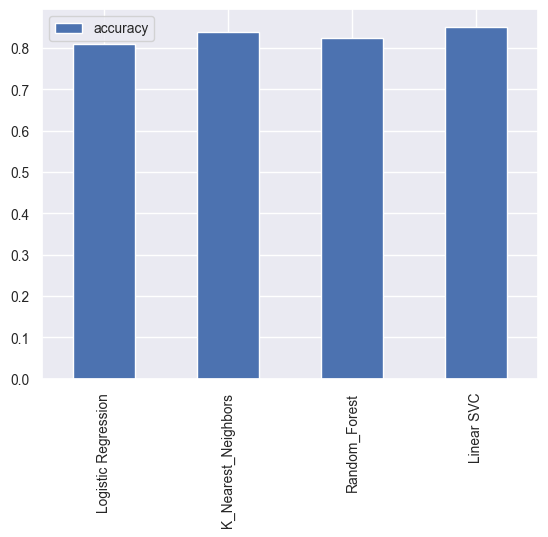

In [66]:
model_compare = pd.DataFrame(model_scores , index=["accuracy"])
model_compare.T.plot.bar()

Now we have got a baseline model... and we know a models first prediction aren't always what we should based our next steps off.

What should we do?

Let's look at the following :
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC Curve
* Area under the curve (AUC)

#### HyperParameter tuning

**K_Nearest_Neighbors**

In [67]:
# lets tune KNN

np.random.seed(23)

train_score =[]
test_score = []

# create a list of different vales for n_neighbors
neighbors = range(1,21)
#setup KNN instance
knn = KNeighborsClassifier()
# loop through different n_neighbors
for n in neighbors:
    knn.set_params(n_neighbors=n)
    #Fit the algorithm
    knn.fit(x_train , y_train)
    # update the training and test score
    train_score.append(knn.score(x_train,y_train))
    test_score.append(knn.score(x_test,y_test))

max knn score is 0.8378378378378378


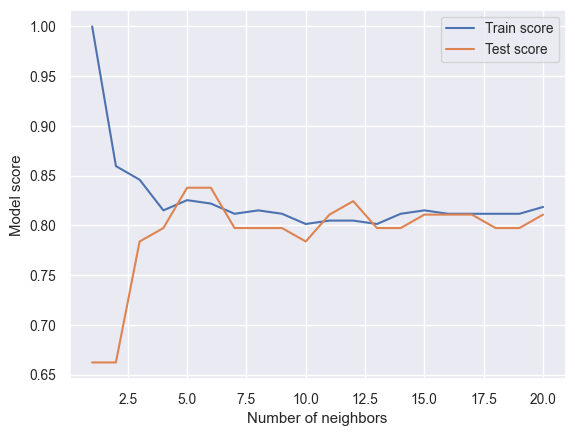

In [68]:
plt.plot(neighbors , train_score , label="Train score")
plt.plot(neighbors , test_score , label="Test score")
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"max knn score is {max(test_score)}")

**Hyperparameter tuning by Randomized Search cross_validation**

we are going to tune:

* LogisticRegression()
* RandomForestClassifier()

In [69]:
# create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C":np.logspace(-4,4,30) ,
                "solver":["liblinear"]}

# create a hyperparameter grid for randomForestClassifier
rf_grid = {"n_estimators" : np.arange(10,1000,50) ,
           "max_depth" : [None , 3, 5, 10] ,
            "min_samples_split" : np.arange(2,20,2),
            "min_samples_leaf" : np.arange(1,20,2)
           }

Now we have got hyperparameters grids setup for each of our models, let's tune them using RandomizedSearchCV...

In [70]:
# Tune LogisticRegression()

np.random.seed(23)

# setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5 ,
                                n_iter=20,
                                verbose=True
                                )

# fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train , y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,LogisticRegression()
,param_distributions,"{'C': array([1.0000...00000000e+04]), 'solver': ['liblinear']}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [71]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(0.0012689610031679222)}

In [72]:
rs_log_reg.score(x_test , y_test)

0.7972972972972973

Now we have tuned LogisticRegression() , let's tune RandomForestClassifier()...

In [73]:
# setup random seed
np.random.seed(23)

# setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5 ,
                           n_iter=20,
                           verbose=True
                           )

# fit random hyperparameter search model for RandomForestClassifier
rs_rf.fit(x_train , y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,RandomForestClassifier()
,param_distributions,"{'max_depth': [None, 3, ...], 'min_samples_leaf': array([ 1, 3..., 15, 17, 19]), 'min_samples_split': array([ 2, 4..., 14, 16, 18]), 'n_estimators': array([ 10, ...60, 910, 960])}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [74]:
rs_rf.best_params_

{'n_estimators': np.int64(460),
 'min_samples_split': np.int64(6),
 'min_samples_leaf': np.int64(1),
 'max_depth': None}

In [75]:
rs_rf.score(x_test , y_test)

0.8378378378378378

Now we have got hyperparameters grids setup for each of our models, let's tune them using GridSearchCV...

Since till now our LinearRegression model provides the best scores so far, we will try to improve it using GridSearchCV()...

In [76]:
np.random.seed(23)

# Different Hyperparameters for our LogisticRegression model
log_reg_grid = {"C":np.logspace(-2,3,30) ,
                "solver":["liblinear"]}

# setup random hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                                param_grid=log_reg_grid,
                                cv=5 ,
                                verbose=True
                                )

gs_log_reg.fit(x_train , y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


,estimator,LogisticRegression()
,param_grid,"{'C': array([1.0000...00000000e+03]), 'solver': ['liblinear']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [77]:
gs_log_reg.best_params_

{'C': np.float64(0.01), 'solver': 'liblinear'}

In [78]:
gs_log_reg.score(x_test , y_test)

0.8108108108108109

In [79]:
np.random.seed(23)
# create a hyperparameter grid for randomForestClassifier
rf_grid = {"n_estimators" : np.arange(10,100,20) ,
           "max_depth" : [None , 3, 5, 10] ,
            "min_samples_split" : np.arange(2,20,5),
            "min_samples_leaf" : np.arange(1,20,5)
           }

# setup random hyperparameter search for RandomForestClassifier

gs_rs_score = GridSearchCV(RandomForestClassifier(),
                           param_grid=rf_grid,
                           cv=5 ,
                           verbose=True)
gs_rs_score.fit(x_train , y_train)


Fitting 5 folds for each of 320 candidates, totalling 1600 fits


,estimator,RandomForestClassifier()
,param_grid,"{'max_depth': [None, 3, ...], 'min_samples_leaf': array([ 1, 6, 11, 16]), 'min_samples_split': array([ 2, 7, 12, 17]), 'n_estimators': array([10, 30, 50, 70, 90])}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,np.int64(30)


In [80]:
y_preds = gs_rs_score.predict(x_test)
gs_rs_score.best_params_

{'max_depth': 5,
 'min_samples_leaf': np.int64(6),
 'min_samples_split': np.int64(17),
 'n_estimators': np.int64(30)}

In [81]:
gs_rs_score.score(x_test , y_test)

0.8243243243243243

#### Evaluating our tuned machine learining classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

...and it would be great if cross_validation was used where possible

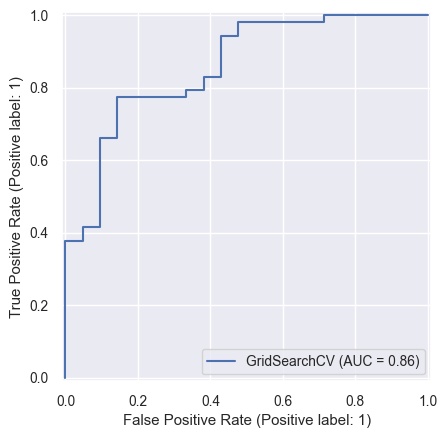

In [82]:
# import and plot the roc_curve score and calculate the auc metrics

RocCurveDisplay.from_estimator(gs_rs_score , x_test , y_test);


#### Confusion matrix

In [83]:
# display the confusion matrix

print(confusion_matrix(y_test , y_preds))

[[12  9]
 [ 4 49]]


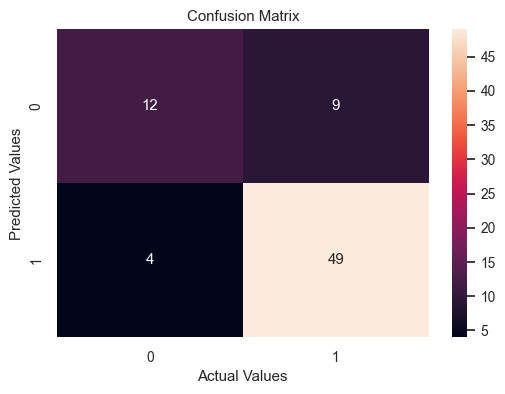

In [84]:
# plot the confusion matrix using seaborn
sns.set(font_scale=.9)

def plot_confusion_matrix(y_test , y_preds):
    """
    Plots a confusion matrix for a given test and prediction data using seaborn heatmap().
    y_test: target variable of test set
    y_preds: predicted target variable of test set
    """
    fig , ax = plt.subplots(figsize=(6,4))
    ax = sns.heatmap(confusion_matrix(y_test , y_preds) , annot=True , fmt="d")
    ax.set_title("Confusion Matrix")
    ax.set_xlabel("Actual Values" )
    ax.set_ylabel("Predicted Values" )

plot_confusion_matrix(y_test , y_preds)


Now we have got our ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as a cross-validated precision, recall and f1-score

In [85]:
print(classification_report(y_test , y_preds))


              precision    recall  f1-score   support

           0       0.75      0.57      0.65        21
           1       0.84      0.92      0.88        53

    accuracy                           0.82        74
   macro avg       0.80      0.75      0.77        74
weighted avg       0.82      0.82      0.82        74



<Axes: >

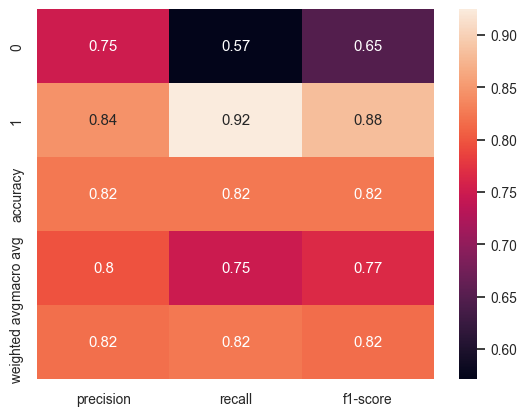

In [86]:
report = classification_report(y_test , y_preds , output_dict=True)
report
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True)

#### Claculate evaluation metrics using cross_validation

we are going to calculate precision, recall and f1-score of our model using cross-validation and to do so we will be using `cross_val_score()`

In [87]:
# check best hyperparameters
gs_rs_score.best_params_

{'max_depth': 5,
 'min_samples_leaf': np.int64(6),
 'min_samples_split': np.int64(17),
 'n_estimators': np.int64(30)}

In [88]:
np.random.seed(23)

model = RandomForestClassifier(n_estimators=30 ,
                               max_depth=3,
                               min_samples_split=2,
                               min_samples_leaf=16 ,
                               )

In [89]:
# cross-validated accuracy
acc = cross_val_score(model , x_train , y_train , cv=5).mean()

In [90]:
# cross-validated precision
pre = cross_val_score(model , x_train , y_train , cv=5 , scoring="precision").mean()

In [91]:
# cross-validated recall
rec = cross_val_score(model , x_train , y_train , cv=5 , scoring="recall").mean()

In [92]:
# cross-validated f1-score
f1 = cross_val_score(model , x_train , y_train , cv=5 , scoring="f1").mean()

<Axes: title={'center': 'Cross-validated classification metrics'}>

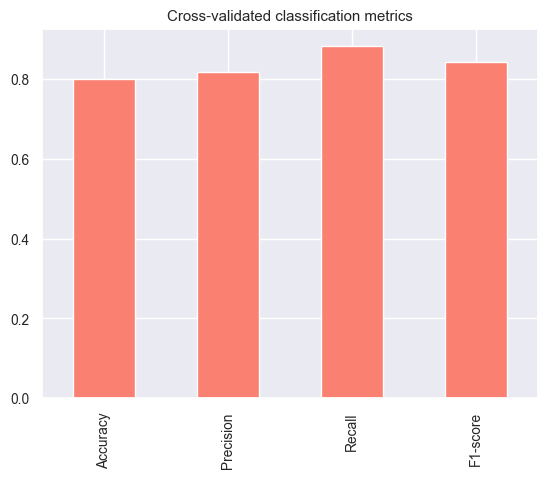

In [93]:
# visual of the cross-validated matrix
cv_matrix = pd.DataFrame({"Accuracy":acc,
                         "Precision":pre,
                          "Recall":rec,
                          "F1-score":f1},
                         index=[0])
cv_matrix.T.plot.bar(title="Cross-validated classification metrics" , legend=False , color=["salmon"] )

In [94]:
cv_matrix

,Accuracy,Precision,Recall,F1-score
0,0.801344,0.819181,0.882821,0.843092


#### Feature importance

Feature importance is another as asking, "Which features contributed most to the outcomes of the model and how did they contributed?"

Finding feature importnace is different for each machine learning model.

let's find the feature importance of RandomForestClassifier() model...

In [95]:
model = RandomForestClassifier(n_estimators=30 ,
                               max_depth=3,
                               min_samples_split=2,
                               min_samples_leaf=16 ,
                               )
model.fit(x_train , y_train)
model.score(x_test , y_test)

0.8243243243243243

In [96]:
model.feature_importances_

array([0.01189743, 0.02635127, 0.03288114, 0.02024572, 0.01671945,
       0.03473838, 0.13619097, 0.34371704, 0.30320136, 0.01063044,
       0.0634268 ])

In [97]:
# Math the features
feature_dict = dict(zip(data.columns , model.feature_importances_))
feature_dict

{'day': np.float64(0.011897434136038765),
 'pressure': np.float64(0.026351271423249722),
 'maxtemp': np.float64(0.03288114007743934),
 'temparature': np.float64(0.0202457181183825),
 'mintemp': np.float64(0.01671945225672072),
 'dewpoint': np.float64(0.03473838411160533),
 'humidity': np.float64(0.13619096533812866),
 'cloud': np.float64(0.34371703918916996),
 'rainfall': np.float64(0.30320135502535783),
 'sunshine': np.float64(0.01063044231747732),
 'winddirection': np.float64(0.0634267980064299)}

<Axes: >

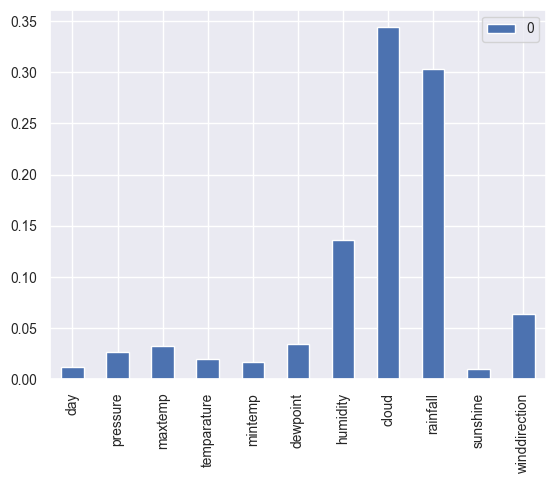

In [98]:
# visual for the feature importance

feature_df = pd.DataFrame(feature_dict , index=[0])
feature_df.T.plot.bar()